# Naive Bayes implementação com Python

In [29]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [6]:
# carga de dados
df = pd.read_csv('/content/Credit.csv')

**Exploração**


In [7]:
# primeiras linhas
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [8]:
# dimensoes
df.shape

(1000, 21)

In [11]:
# atributos
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [9]:
# tipos de dados
df.dtypes

,0
checking_status,object
duration,int64
credit_history,object
purpose,object
credit_amount,int64
savings_status,object
employment,object
installment_commitment,int64
personal_status,object
other_parties,object


In [10]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [12]:
# confirmando nao nulos
df.isnull().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


In [13]:
# descritiva
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [15]:
# variavel alvo
df['class'].value_counts()

,count
class,
good,700
bad,300


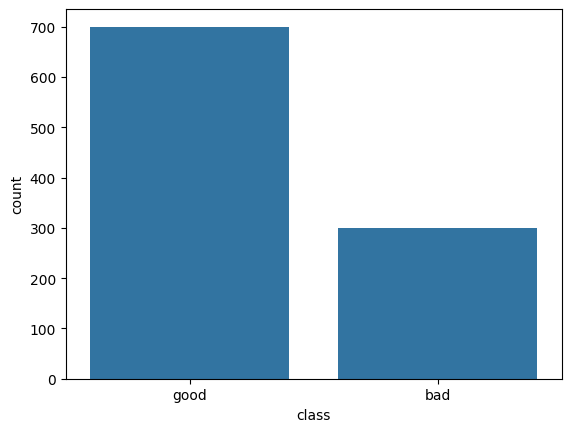

In [16]:
# visualizando
sns.countplot(x='class', data=df)
plt.show()

**pre processamento e modelagem**

In [17]:
# separando previsores e classe
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# dimensoes
X.shape, y.shape

((1000, 20), (1000,))

In [19]:
# idendificando atributos categoricos e numericos
categoricas = X.select_dtypes(include=['object']).columns
numericas = X.select_dtypes(include=['int64', 'float64']).columns

categoricas, numericas

(Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
        'employment', 'personal_status', 'other_parties', 'property_magnitude',
        'other_payment_plans', 'housing', 'job', 'own_telephone',
        'foreign_worker'],
       dtype='object'),
 Index(['duration', 'credit_amount', 'installment_commitment',
        'residence_since', 'age', 'existing_credits', 'num_dependents'],
       dtype='object'))

In [20]:
# transformando atributos
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categoricas),
    ('scaler', StandardScaler(), numericas)
])

In [21]:
# aplicacao preprocessor e divisao treino/teste
X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

In [24]:
# visualizando dados e dimensões das bases
X_transformed, X_train.shape, X_test.shape, y_train.shape, y_test.shape

(array([[ 0.        ,  0.        ,  1.        , ...,  2.76645648,
          1.02707891, -0.42828957],
        [ 0.        ,  1.        ,  0.        , ..., -1.19140394,
         -0.704926  , -0.42828957],
        [ 1.        ,  0.        ,  0.        , ...,  1.18331231,
         -0.704926  ,  2.33486893],
        ...,
        [ 1.        ,  0.        ,  0.        , ...,  0.21583532,
         -0.704926  , -0.42828957],
        [ 0.        ,  0.        ,  1.        , ..., -1.10345149,
         -0.704926  , -0.42828957],
        [ 0.        ,  1.        ,  0.        , ..., -0.75164167,
         -0.704926  , -0.42828957]]),
 (700, 61),
 (300, 61),
 (700,),
 (300,))

In [25]:
# treinamento do modelo
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [27]:
# previsoes
y_pred = model.predict(X_test)
y_pred, y_pred.shape

(array(['good', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'good',
        'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'good',
        'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad',
        'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
        'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good',
        'good', 'good', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good',
        'good', 'bad', 'good', 'good', 'good', 'bad', 'bad', 'good',
        'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
        'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'bad', 'bad',
        'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'bad',
        'bad', 'bad', 'bad', 'good', 'good', 'good', 'good', 'bad', 'bad',
        'good', 'good', 'good', 'bad', 'bad', 'bad', 'good', 'good',
        'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad',
        'good', 'bad', 'bad', 'good', 'bad', 'good', '

**avaliações**

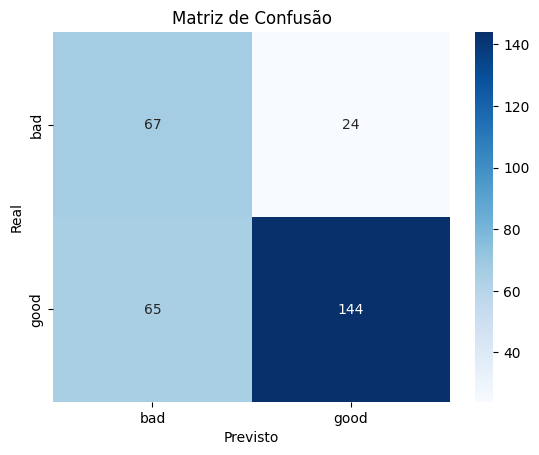

In [31]:
# matriz
matriz_confusao = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [33]:
# metricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='good')
recall = recall_score(y_test, y_pred, pos_label='good')
f1 = f1_score(y_test, y_pred, pos_label='good')

# resultados
print(f"""
  Métricas:
    Acurácia: {accuracy:.2f}
    Precisão: {precision:.2f}
    Recall: {recall:.2f}
    F1-Score: {f1:.2f}
""")


  Métricas:  
    Acurácia: 0.70
    Precisão: 0.86
    Recall: 0.69
    F1-Score: 0.76



Em conclusão das métricas, alta precisão (86%) indica que as previsões "positivas" são confiáveis, o F1-Score de 76% sugere um desempenho balanceado.
Recall baixo (69%) significa que o modelo pode estar subestimando a classe "good".

Em um cenário crítico, como aprovação de crédito, falsos negativos podem ser problemáticos.